# DBSCAN

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def normalization(X,degree):
    """ A scaling technique in which values 
    are shifted and rescaled so that they 
    end up ranging between 0 and 1. 
    It is also known as Min-Max scaling 
    ----------------------------------------
    degree: polynomial regression degree, or attribute/feature number
    """
    X[:, :(degree)] = (X[:, :(degree)] - np.amin(X[:, :(degree)], axis = 0))/ \
    (np.amax(X[:, :(degree)], axis = 0) - np.amin(X[:, :(degree)], axis = 0))
    return X 

def readin_csv_data_clustering(path):
    df = pd.read_csv(path) 
    X = df.iloc[:,:].values 
    return X

class DBSCAN():
    '''DBSCAN: Density-Bases Spatial Clustering of Applications with Noise
       eps: a float parameter used to specify the radius of neighborhood w.r.t.
            some point
       minpt:the least number of points around a core point'''
    
    def __init__(self, eps, minpt):
        self.e = eps
        self.m = minpt
        self.outlier_label = 0
        self.core_label = -1
        self.border_label = -2
        self.fw = 8 # figure width
        self.fl = 8 # figure length
        
    def get_neighbour_points(self, X, idx_c):
        tmp = []
        for i in range(len(X)):
            if np.linalg.norm([x1 - x2 for x1, x2 in zip(X[i], X[idx_c])]) <= self.e:
                tmp.append(i)
        return tmp
    
    def intersection(self, l1, l2): 
        return [value for value in l1 if value in l2] 
    
    def fit(self, X):
        
        #find all core points, core label: -1, border label: -2, outlier label:0
        point_label = [self.outlier_label]*len(X)
        core_label = []
        border_label = []
        neighbor_points_set = []
        for i in range(len(X)):
            neighbor_points_set.append(self.get_neighbour_points(X, i))
            if(len(neighbor_points_set[i])>=self.m):
                core_label.append(i)
                point_label[i] = self.core_label
            else:
                border_label.append(i)
        for i in border_label:
            for j in neighbor_points_set[i]:
                if j in core_label:
                    point_label[i] = self.border_label
                    break
                    
        #find cluster
        cluster = 1
        unvisited_set = [i for i in range(len(X))]
        queue = []
        cluster_set = []
        while not len(core_label)==0:
            unvisited_set_old = unvisited_set
            queue = random.choice(core_label)
            unvisited_set = [i for i in unvisited_set if i not in neighbor_points_set[queue]]
            while not len(neighbor_points_set[queue])==0:
                first_sample = neighbor_points_set[queue].pop(0)
                if(point_label[first_sample] == self.core_label):
                    dtmp = self.intersection(neighbor_points_set[first_sample], unvisited_set)
                    neighbor_points_set[queue].extend(dtmp)
                    unvisited_set = [i for i in unvisited_set if i not in dtmp]
            cluster_set = [i for i in unvisited_set_old if i not in unvisited_set]
            for i in cluster_set:
                point_label[i] = cluster
            cluster = cluster + 1
            core_label = [i for i in core_label if i not in cluster_set]
            
            
        return point_label, cluster
    
    def DBSCAN_visualize(self, X, point_label, n):
        plt.figure(figsize = (self.fl, self.fw))
        for i in range(n):
            x, y = [], []
            for j in range(len(X)):
                if point_label[j] == i:
                    x.append(X[j, 0])
                    y.append(X[j, 1])
            if(i == self.outlier_label):
                plt.scatter(x, y, c='r', alpha=1, marker='x', s=100, label = 'Outliers')
            else:
                plt.scatter(x, y, alpha=0.8, marker='.', cmap=plt.cm.jet, s=100, \
                            label = 'cluster '+str(i))
        plt.grid(True)
        plt.legend() 
        plt.show()
        
          
        

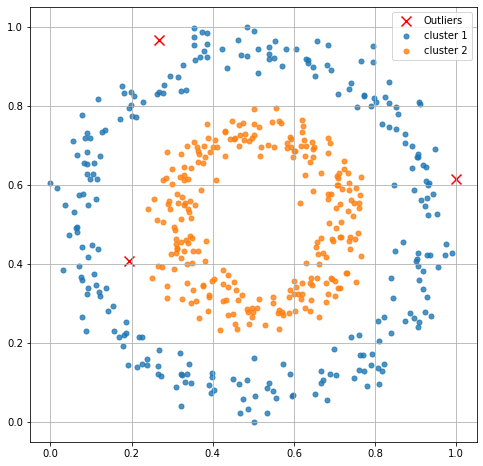

In [3]:
def main():

    X = readin_csv_data_clustering("concentric_circles.csv")
    X = normalization(X, 2)
    model = DBSCAN(0.06, 3)
    point_labels, clusters = model.fit(X)
    model.DBSCAN_visualize(X, point_labels, clusters)

if __name__ == "__main__":
    main()